In [329]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [330]:
std_data=pd.read_csv("C:/Users/prana/DA_Project_1/LaLiga2023-24/standard_player_stat.csv")
sho_data=pd.read_csv("C:/Users/prana/DA_Project_1/LaLiga2023-24/stats_shooting.csv")
pass_data=pd.read_csv("C:/Users/prana/DA_Project_1/LaLiga2023-24/stats_passing.csv")
gca_data=pd.read_csv("C:/Users/prana/DA_Project_1/LaLiga2023-24/stats_gca.csv")
def_data=pd.read_csv("C:/Users/prana/DA_Project_1/LaLiga2023-24/stats_defense.csv")
poss_data=pd.read_csv("C:/Users/prana/DA_Project_1/LaLiga2023-24/stats_possession.csv")

In [331]:
std_data.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'MP', 'Starts',
       'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY',
       'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR',
       'Gls.1', 'Ast.1', 'G+A.1', 'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1',
       'xG+xAG', 'npxG.1', 'npxG+xAG.1', 'Matches'],
      dtype='object')

In [332]:
std_data.dropna(inplace=True)
std_data['Pos']=std_data['Pos'].str.split(',',expand=True)[0]
std_data.drop(columns=['Nation','Age','Born','Starts','G+A','G-PK','PK','PKatt','CrdY','CrdR','npxG','npxG+xAG','G+A.1','G-PK.1','G+A-PK','xG+xAG','npxG.1','npxG+xAG.1', 'Matches'],inplace=True)
std_data['Min']=std_data['Min'].str.replace(',','').astype('int')
std_data.rename(columns={'Gls.1':'Gls/90','Ast.1':'Ast/90','xG.1':'xG/90','xAG.1':'xAG/90'},inplace=True)
std_data.head(3)

,Player,Pos,Squad,MP,Min,90s,Gls,Ast,xG,xAG,PrgC,PrgP,PrgR,Gls/90,Ast/90,xG/90,xAG/90
0,Nabil Aberdin,DF,Getafe,2.0,180,2.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.00,0.00,0.00
1,Abner,DF,Betis,23.0,1400,15.6,0.0,1.0,0.1,1.0,14.0,33.0,58.0,0.0,0.06,0.01,0.06
2,Abdel Abqar,DF,Alavés,27.0,2312,25.7,0.0,0.0,0.5,0.2,7.0,49.0,1.0,0.0,0.00,0.02,0.01


In [333]:
sho_data.head(3)

,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,SoT,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,Nabil Aberdin,fr FRA,DF,Getafe,20.0,2002.0,2.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Matches
1,Abner,br BRA,DF,Betis,23.0,2000.0,15.6,0.0,4.0,0.0,...,15.4,0.0,0.0,0.0,0.1,0.1,0.03,-0.1,-0.1,Matches
2,Abdel Abqar,ma MAR,DF,Alavés,24.0,1999.0,25.7,0.0,10.0,3.0,...,12.1,0.0,0.0,0.0,0.5,0.5,0.05,-0.5,-0.5,Matches


In [334]:
print(sho_data.columns)
print(sho_data.shape)

Index(['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'Gls', 'Sh',
       'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK',
       'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Matches'],
      dtype='object')
(633, 25)


In [335]:
sho_data.drop(columns=['Pos','SoT%','Nation','Age','Born','90s','Gls','G/Sh','G/SoT','FK','PK','PKatt','xG','npxG','npxG/Sh','G-xG','np:G-xG','Matches'],inplace=True)
sho_data.columns

Index(['Player', 'Squad', 'Sh', 'SoT', 'Sh/90', 'SoT/90', 'Dist'], dtype='object')

In [336]:
sho_data.dropna(subset=['Player'],inplace=True)
sho_data.isna().sum()

Player      0
Squad       0
Sh          0
SoT         0
Sh/90       0
SoT/90      0
Dist      116
dtype: int64

In [337]:
print(sho_data[(sho_data['Dist'].isna())].shape)
print(sho_data[(sho_data['Dist'].isna() & (sho_data['Sh']==0))].shape)
#All of them have taken 0 shots, hence we can fill null values with 0 as both of the attributes containing null values are related to shots
from sklearn.impute import SimpleImputer
sho_data['Dist']=sho_data['Dist'].fillna(0)
sho_data.isna().sum()

(116, 7)
(116, 7)


Player    0
Squad     0
Sh        0
SoT       0
Sh/90     0
SoT/90    0
Dist      0
dtype: int64

In [338]:
data=pd.merge(std_data,sho_data,on=['Player','Squad'],how='inner')
print(data.shape)
data.sample(n=5)

(608, 22)


,Player,Pos,Squad,MP,Min,90s,Gls,Ast,xG,xAG,...,PrgR,Gls/90,Ast/90,xG/90,xAG/90,Sh,SoT,Sh/90,SoT/90,Dist
419,Sokratis Papastathopoulos,DF,Betis,15.0,1136,12.6,0.0,0.0,0.3,0.0,...,1.0,0.00,0.00,0.02,0.00,2.0,1.0,0.16,0.08,7.9
201,Paulo Gazzaniga,GK,Girona,38.0,3420,38.0,0.0,0.0,0.0,0.7,...,0.0,0.00,0.00,0.00,0.02,0.0,0.0,0.00,0.00,0.0
435,Alberto Perea,MF,Granada,2.0,2,0.0,0.0,0.0,0.0,0.1,...,1.0,0.00,0.00,0.00,4.87,0.0,0.0,0.00,0.00,0.0
364,Ignasi Miquel,DF,Granada,34.0,2992,33.2,1.0,1.0,1.4,1.2,...,8.0,0.03,0.03,0.04,0.04,22.0,8.0,0.66,0.24,12.7
607,Martín Zubimendi,MF,Real Sociedad,31.0,2654,29.5,4.0,1.0,2.7,1.5,...,27.0,0.14,0.03,0.09,0.05,22.0,11.0,0.75,0.37,14.8


In [339]:
pass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   609 non-null    object 
 1   Nation   609 non-null    object 
 2   Pos      609 non-null    object 
 3   Squad    609 non-null    object 
 4   Age      608 non-null    float64
 5   Born     608 non-null    float64
 6   90s      609 non-null    float64
 7   Cmp      609 non-null    float64
 8   Att      609 non-null    float64
 9   Cmp%     603 non-null    float64
 10  TotDist  609 non-null    float64
 11  PrgDist  609 non-null    float64
 12  Cmp.1    609 non-null    float64
 13  Att.1    609 non-null    float64
 14  Cmp%.1   601 non-null    float64
 15  Cmp.2    609 non-null    float64
 16  Att.2    609 non-null    float64
 17  Cmp%.2   597 non-null    float64
 18  Cmp.3    609 non-null    float64
 19  Att.3    609 non-null    float64
 20  Cmp%.3   572 non-null    float64
 21  Ast      609 non

In [340]:
pass_data.drop(columns=['Matches','Nation','Pos','Age','Born','90s','xAG','Ast','A-xAG','Cmp%','Cmp%.1','Cmp%.2','Cmp%.3','Cmp','Cmp.1','Cmp.2','Cmp.3','PrgP','Att'],inplace=True)
pass_data.rename(columns={'1/3':'FinalThirdPass','KP':'keyPass','PPA':'PenaltyAreaPass','CrsPA':'PenaltyAreaCross','Att.1':'ShortPasses','Att.2':'MediumPasses','Att.3':'LongPasses'},inplace=True)
pass_data.columns

Index(['Player', 'Squad', 'TotDist', 'PrgDist', 'ShortPasses', 'MediumPasses',
       'LongPasses', 'xA', 'keyPass', 'FinalThirdPass', 'PenaltyAreaPass',
       'PenaltyAreaCross'],
      dtype='object')

In [341]:
pass_data.dropna(inplace=True)
pass_data.shape
pass_data.isna().sum()

Player              0
Squad               0
TotDist             0
PrgDist             0
ShortPasses         0
MediumPasses        0
LongPasses          0
xA                  0
keyPass             0
FinalThirdPass      0
PenaltyAreaPass     0
PenaltyAreaCross    0
dtype: int64

In [342]:
data=pd.merge(data,pass_data,on=['Player','Squad',],how='inner')
data.sample(n=5)

,Player,Pos,Squad,MP,Min,90s,Gls,Ast,xG,xAG,...,TotDist,PrgDist,ShortPasses,MediumPasses,LongPasses,xA,keyPass,FinalThirdPass,PenaltyAreaPass,PenaltyAreaCross
331,Mika Màrmol,DF,Las Palmas,36.0,3178,35.3,0.0,1.0,0.2,1.0,...,35639.0,14409.0,1235.0,1048.0,218.0,1.1,5.0,147.0,5.0,2.0
361,Luis Milla,MF,Getafe,27.0,2115,23.5,0.0,1.0,0.6,1.7,...,19294.0,5597.0,490.0,468.0,250.0,2.1,29.0,140.0,10.0,6.0
372,Jon Moncayola,MF,Osasuna,33.0,1800,20.0,1.0,3.0,0.6,2.3,...,14615.0,4122.0,387.0,401.0,198.0,2.5,21.0,95.0,15.0,5.0
77,Manu Bueno,MF,Sevilla,4.0,117,1.3,0.0,0.0,0.0,0.1,...,831.0,175.0,18.0,22.0,7.0,0.0,2.0,1.0,1.0,0.0
299,Enzo Loiodice,MF,Las Palmas,34.0,1790,19.9,0.0,1.0,0.5,1.3,...,13041.0,2865.0,635.0,323.0,74.0,1.8,19.0,81.0,7.0,0.0


In [343]:
data.columns

Index(['Player', 'Pos', 'Squad', 'MP', 'Min', '90s', 'Gls', 'Ast', 'xG', 'xAG',
       'PrgC', 'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'xG/90', 'xAG/90', 'Sh',
       'SoT', 'Sh/90', 'SoT/90', 'Dist', 'TotDist', 'PrgDist', 'ShortPasses',
       'MediumPasses', 'LongPasses', 'xA', 'keyPass', 'FinalThirdPass',
       'PenaltyAreaPass', 'PenaltyAreaCross'],
      dtype='object')

In [344]:
gca_data.info()
gca_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      609 non-null    object 
 1   Nation      609 non-null    object 
 2   Pos         609 non-null    object 
 3   Squad       609 non-null    object 
 4   Age         608 non-null    float64
 5   Born        608 non-null    float64
 6   90s         609 non-null    float64
 7   SCA         609 non-null    float64
 8   SCA90       609 non-null    float64
 9   PassLive    609 non-null    float64
 10  PassDead    609 non-null    float64
 11  TO          609 non-null    float64
 12  Sh          609 non-null    float64
 13  Fld         609 non-null    float64
 14  Def         609 non-null    float64
 15  GCA         609 non-null    float64
 16  GCA90       609 non-null    float64
 17  PassLive.1  609 non-null    float64
 18  PassDead.1  609 non-null    float64
 19  TO.1        609 non-null    f

Index(['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s', 'SCA',
       'SCA90', 'PassLive', 'PassDead', 'TO', 'Sh', 'Fld', 'Def', 'GCA',
       'GCA90', 'PassLive.1', 'PassDead.1', 'TO.1', 'Sh.1', 'Fld.1', 'Def.1',
       'Matches'],
      dtype='object')

In [345]:
gca_data.drop(columns=['Nation','Pos','Born','Age','90s','SCA','GCA','PassLive.1', 'PassDead.1', 'TO.1', 'Sh.1', 'Fld.1', 'Def.1','Matches'],axis=1,inplace=True)

In [346]:
gca_data.dropna(inplace=True)
gca_data.isna().sum()

Player      0
Squad       0
SCA90       0
PassLive    0
PassDead    0
TO          0
Sh          0
Fld         0
Def         0
GCA90       0
dtype: int64

In [347]:
data=pd.merge(data,gca_data,on=['Player','Squad',],how='inner')
data.sample(n=5)

,Player,Pos,Squad,MP,Min,90s,Gls,Ast,xG,xAG,...,PenaltyAreaPass,PenaltyAreaCross,SCA90,PassLive,PassDead,TO,Sh_y,Fld,Def,GCA90
435,Alberto Perea,MF,Granada,2.0,2,0.0,0.0,0.0,0.0,0.1,...,1.0,0.0,90.00,1.0,0.0,0.0,0.0,1.0,0.0,0.00
360,Éder Militão,DF,Real Madrid,10.0,496,5.5,0.0,0.0,0.1,0.0,...,0.0,0.0,0.36,2.0,0.0,0.0,0.0,0.0,0.0,0.18
175,Pablo Fornals,FW,Betis,15.0,1148,12.8,3.0,2.0,1.8,1.6,...,25.0,6.0,3.53,37.0,3.0,2.0,2.0,1.0,0.0,0.47
233,Ianis Hagi,MF,Alavés,22.0,804,8.9,0.0,2.0,2.8,2.0,...,12.0,4.0,5.37,26.0,15.0,3.0,3.0,1.0,0.0,0.11
365,Rafa Mir,FW,Sevilla,15.0,391,4.3,2.0,0.0,1.4,0.3,...,1.0,1.0,2.99,7.0,0.0,2.0,3.0,1.0,0.0,0.46


In [348]:
def_data.info()
def_data.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 24 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   609 non-null    object 
 1   Nation   609 non-null    object 
 2   Pos      609 non-null    object 
 3   Squad    609 non-null    object 
 4   Age      608 non-null    float64
 5   Born     608 non-null    float64
 6   90s      609 non-null    float64
 7   Tkl      609 non-null    float64
 8   TklW     609 non-null    float64
 9   Def 3rd  609 non-null    float64
 10  Mid 3rd  609 non-null    float64
 11  Att 3rd  609 non-null    float64
 12  Tkl.1    609 non-null    float64
 13  Att      609 non-null    float64
 14  Tkl%     543 non-null    float64
 15  Lost     609 non-null    float64
 16  Blocks   609 non-null    float64
 17  Sh       609 non-null    float64
 18  Pass     609 non-null    float64
 19  Int      609 non-null    float64
 20  Tkl+Int  609 non-null    float64
 21  Clr      609 non

,Player,Nation,Pos,Squad,Age,Born,90s,Tkl,TklW,Def 3rd,...,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Matches
356,Luís Maximiano,pt POR,GK,Almería,24.0,1999.0,33.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,19.0,2.0,Matches
98,William Carvalho,pt POR,MF,Betis,31.0,1992.0,7.6,20.0,12.0,11.0,...,62.5,6.0,8.0,1.0,7.0,8.0,28.0,9.0,1.0,Matches
387,César Montes,mx MEX,DF,Almería,26.0,1997.0,19.9,22.0,13.0,13.0,...,50.0,9.0,21.0,9.0,12.0,11.0,33.0,94.0,0.0,Matches
275,Juanpe,es ESP,DF,Girona,32.0,1991.0,8.3,11.0,8.0,8.0,...,90.0,1.0,17.0,11.0,6.0,7.0,18.0,50.0,1.0,Matches
84,Sergio Camello,es ESP,FW,Rayo Vallecano,22.0,2001.0,18.5,16.0,5.0,3.0,...,40.0,9.0,10.0,2.0,8.0,3.0,19.0,15.0,0.0,Matches


In [349]:
def_data.dropna(subset=['Player'],inplace=True)
def_data['Tkl%']=def_data['Tkl%'].fillna(0)
def_data.drop(columns=['Tkl','Nation','Pos','Age','Born','90s','TklW','Tkl.1','Tkl%','Lost','Blocks','Tkl+Int','Err','Matches'],axis=1,inplace=True)
def_data.rename(columns={'Clr':'Clearances','Int':'Interceptions','Sh':'ShotsBlocked','Pass':'PassesBlocked','Att':'Challenges','Att 3rd':'Tkl Att 3rd','Mid 3rd':'Tkl Mid 3rd','Def 3rd':'Tkl Def 3rd'},inplace=True)

In [350]:
data=pd.merge(data,def_data,on=['Player','Squad'],how='inner')
data.sample(n=5)

,Player,Pos,Squad,MP,Min,90s,Gls,Ast,xG,xAG,...,Def,GCA90,Tkl Def 3rd,Tkl Mid 3rd,Tkl Att 3rd,Challenges,ShotsBlocked,PassesBlocked,Interceptions,Clearances
496,Vitor Roque,FW,Barcelona,14.0,328,3.6,2.0,0.0,2.5,0.0,...,0.0,0.27,2.0,0.0,1.0,2.0,0.0,3.0,0.0,5.0
51,Iván Balliu,DF,Rayo Vallecano,33.0,2873,31.9,0.0,1.0,0.7,2.6,...,1.0,0.09,20.0,24.0,0.0,39.0,11.0,16.0,29.0,66.0
601,Lamine Yamal,FW,Barcelona,37.0,2201,24.5,5.0,5.0,5.2,6.2,...,5.0,0.74,32.0,15.0,14.0,48.0,0.0,32.0,19.0,11.0
373,César Montes,DF,Almería,21.0,1788,19.9,0.0,0.0,0.7,0.2,...,0.0,0.00,13.0,9.0,0.0,18.0,9.0,12.0,11.0,94.0
63,Fran Beltrán,MF,Celta Vigo,33.0,2428,27.0,0.0,0.0,0.7,1.1,...,0.0,0.11,22.0,23.0,11.0,63.0,2.0,26.0,18.0,34.0


In [351]:
data.columns

Index(['Player', 'Pos', 'Squad', 'MP', 'Min', '90s', 'Gls', 'Ast', 'xG', 'xAG',
       'PrgC', 'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'xG/90', 'xAG/90', 'Sh_x',
       'SoT', 'Sh/90', 'SoT/90', 'Dist', 'TotDist', 'PrgDist', 'ShortPasses',
       'MediumPasses', 'LongPasses', 'xA', 'keyPass', 'FinalThirdPass',
       'PenaltyAreaPass', 'PenaltyAreaCross', 'SCA90', 'PassLive', 'PassDead',
       'TO', 'Sh_y', 'Fld', 'Def', 'GCA90', 'Tkl Def 3rd', 'Tkl Mid 3rd',
       'Tkl Att 3rd', 'Challenges', 'ShotsBlocked', 'PassesBlocked',
       'Interceptions', 'Clearances'],
      dtype='object')

In [352]:
poss_data.info()
poss_data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 30 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   609 non-null    object 
 1   Nation   609 non-null    object 
 2   Pos      609 non-null    object 
 3   Squad    609 non-null    object 
 4   Age      608 non-null    float64
 5   Born     608 non-null    float64
 6   90s      609 non-null    float64
 7   Touches  609 non-null    float64
 8   Def Pen  609 non-null    float64
 9   Def 3rd  609 non-null    float64
 10  Mid 3rd  609 non-null    float64
 11  Att 3rd  609 non-null    float64
 12  Att Pen  609 non-null    float64
 13  Live     609 non-null    float64
 14  Att      609 non-null    float64
 15  Succ     609 non-null    float64
 16  Succ%    508 non-null    float64
 17  Tkld     609 non-null    float64
 18  Tkld%    508 non-null    float64
 19  Carries  609 non-null    float64
 20  TotDist  609 non-null    float64
 21  PrgDist  609 non

Player      24
Nation      24
Pos         24
Squad       24
Age         25
Born        25
90s         24
Touches     24
Def Pen     24
Def 3rd     24
Mid 3rd     24
Att 3rd     24
Att Pen     24
Live        24
Att         24
Succ        24
Succ%      125
Tkld        24
Tkld%      125
Carries     24
TotDist     24
PrgDist     24
PrgC        24
1/3         24
CPA         24
Mis         24
Dis         24
Rec         24
PrgR        24
Matches     24
dtype: int64

In [353]:
poss_data.drop(columns=['Matches','Nation','Pos','Age','90s','Born','Touches','Live','Att','Succ','Succ%','Tkld','Tkld%','TotDist','PrgDist','PrgC','Mis','Dis'],axis=1,inplace=True)
poss_data.rename(columns={'Att 3rd':'Touches Att 3rd','Mid 3rd':'Touches Mid 3rd','Def 3rd':'Touches Def 3rd','Def Pen':'Touches Def Pen','Att Pen':'Touches Att Pen','1/3':'Final Third Carry','CPA':'Carries to Penalty Area','Rec':'Receive','PrgR':'PrgReceive'},inplace=True)
poss_data.dropna(inplace=True)
print(poss_data.shape)
print(poss_data.columns)
poss_data.sample(n=5)

(609, 12)
Index(['Player', 'Squad', 'Touches Def Pen', 'Touches Def 3rd',
       'Touches Mid 3rd', 'Touches Att 3rd', 'Touches Att Pen', 'Carries',
       'Final Third Carry', 'Carries to Penalty Area', 'Receive',
       'PrgReceive'],
      dtype='object')


,Player,Squad,Touches Def Pen,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Touches Att Pen,Carries,Final Third Carry,Carries to Penalty Area,Receive,PrgReceive
24,Yeray Álvarez,Athletic Club,52.0,344.0,440.0,31.0,7.0,428.0,9.0,1.0,485.0,2.0
503,Óscar Rodríguez Arnaiz,Getafe,7.0,56.0,287.0,259.0,30.0,320.0,24.0,4.0,415.0,48.0
271,Willian José,Betis,18.0,50.0,333.0,304.0,73.0,377.0,8.0,2.0,536.0,90.0
300,Florian Lejeune,Rayo Vallecano,341.0,1317.0,953.0,131.0,36.0,1250.0,6.0,0.0,1494.0,4.0
53,Iván Balliu,Rayo Vallecano,83.0,477.0,797.0,471.0,33.0,708.0,29.0,5.0,876.0,100.0


In [354]:
data=pd.merge(data,poss_data,on=['Player','Squad'],how='inner')
data.columns

Index(['Player', 'Pos', 'Squad', 'MP', 'Min', '90s', 'Gls', 'Ast', 'xG', 'xAG',
       'PrgC', 'PrgP', 'PrgR', 'Gls/90', 'Ast/90', 'xG/90', 'xAG/90', 'Sh_x',
       'SoT', 'Sh/90', 'SoT/90', 'Dist', 'TotDist', 'PrgDist', 'ShortPasses',
       'MediumPasses', 'LongPasses', 'xA', 'keyPass', 'FinalThirdPass',
       'PenaltyAreaPass', 'PenaltyAreaCross', 'SCA90', 'PassLive', 'PassDead',
       'TO', 'Sh_y', 'Fld', 'Def', 'GCA90', 'Tkl Def 3rd', 'Tkl Mid 3rd',
       'Tkl Att 3rd', 'Challenges', 'ShotsBlocked', 'PassesBlocked',
       'Interceptions', 'Clearances', 'Touches Def Pen', 'Touches Def 3rd',
       'Touches Mid 3rd', 'Touches Att 3rd', 'Touches Att Pen', 'Carries',
       'Final Third Carry', 'Carries to Penalty Area', 'Receive',
       'PrgReceive'],
      dtype='object')

In [355]:
data.rename(columns={'Sh_x':'Shots','TO':'SCA_TO','Sh_y':'SCA_Shots','Fld':'SCA_FoulsDrawn','Def':'SCA_Def','PrgC':'PrgCarries','PrgP':'PrgPasses'},inplace=True)
data.drop(columns=['PrgR'],axis=1,inplace=True)
data.columns

Index(['Player', 'Pos', 'Squad', 'MP', 'Min', '90s', 'Gls', 'Ast', 'xG', 'xAG',
       'PrgCarries', 'PrgPasses', 'Gls/90', 'Ast/90', 'xG/90', 'xAG/90',
       'Shots', 'SoT', 'Sh/90', 'SoT/90', 'Dist', 'TotDist', 'PrgDist',
       'ShortPasses', 'MediumPasses', 'LongPasses', 'xA', 'keyPass',
       'FinalThirdPass', 'PenaltyAreaPass', 'PenaltyAreaCross', 'SCA90',
       'PassLive', 'PassDead', 'SCA_TO', 'SCA_Shots', 'SCA_FoulsDrawn',
       'SCA_Def', 'GCA90', 'Tkl Def 3rd', 'Tkl Mid 3rd', 'Tkl Att 3rd',
       'Challenges', 'ShotsBlocked', 'PassesBlocked', 'Interceptions',
       'Clearances', 'Touches Def Pen', 'Touches Def 3rd', 'Touches Mid 3rd',
       'Touches Att 3rd', 'Touches Att Pen', 'Carries', 'Final Third Carry',
       'Carries to Penalty Area', 'Receive', 'PrgReceive'],
      dtype='object')

In [356]:
data.sample(n=5)

,Player,Pos,Squad,MP,Min,90s,Gls,Ast,xG,xAG,...,Touches Def Pen,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Touches Att Pen,Carries,Final Third Carry,Carries to Penalty Area,Receive,PrgReceive
367,Stefan Mitrović,DF,Getafe,11.0,699,7.8,1.0,0.0,0.1,0.3,...,39.0,156.0,147.0,5.0,2.0,140.0,0.0,0.0,142.0,2.0
378,Ilaix Moriba,MF,Getafe,14.0,605,6.7,0.0,2.0,0.3,0.6,...,9.0,30.0,176.0,87.0,14.0,158.0,8.0,2.0,181.0,19.0
380,Cristhian Mosquera,DF,Valencia,36.0,3075,34.2,0.0,0.0,0.7,0.0,...,274.0,1105.0,841.0,46.0,15.0,1111.0,6.0,3.0,1240.0,4.0
175,Pablo Fornals,FW,Betis,15.0,1148,12.8,3.0,2.0,1.8,1.6,...,10.0,103.0,423.0,295.0,40.0,420.0,23.0,13.0,571.0,82.0
552,Ramón Terrats,MF,Villarreal,19.0,785,8.7,0.0,2.0,0.4,1.6,...,20.0,108.0,299.0,158.0,12.0,304.0,13.0,3.0,394.0,54.0


In [357]:
data.isna().sum()

Player                     0
Pos                        0
Squad                      0
MP                         0
Min                        0
90s                        0
Gls                        0
Ast                        0
xG                         0
xAG                        0
PrgCarries                 0
PrgPasses                  0
Gls/90                     0
Ast/90                     0
xG/90                      0
xAG/90                     0
Shots                      0
SoT                        0
Sh/90                      0
SoT/90                     0
Dist                       0
TotDist                    0
PrgDist                    0
ShortPasses                0
MediumPasses               0
LongPasses                 0
xA                         0
keyPass                    0
FinalThirdPass             0
PenaltyAreaPass            0
PenaltyAreaCross           0
SCA90                      0
PassLive                   0
PassDead                   0
SCA_TO        

In [358]:
#finds duplicate columns
cols=data.columns
for i in range(len(cols)):
    for j in range(i+1,len(cols)):
        if(data[cols[i]].equals(data[cols[j]])):
            print(cols[i],' & ',cols[j])

In [359]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Player                   608 non-null    object 
 1   Pos                      608 non-null    object 
 2   Squad                    608 non-null    object 
 3   MP                       608 non-null    float64
 4   Min                      608 non-null    int32  
 5   90s                      608 non-null    float64
 6   Gls                      608 non-null    float64
 7   Ast                      608 non-null    float64
 8   xG                       608 non-null    float64
 9   xAG                      608 non-null    float64
 10  PrgCarries               608 non-null    float64
 11  PrgPasses                608 non-null    float64
 12  Gls/90                   608 non-null    float64
 13  Ast/90                   608 non-null    float64
 14  xG/90                    6

In [360]:
data.describe()

,MP,Min,90s,Gls,Ast,xG,xAG,PrgCarries,PrgPasses,Gls/90,...,Touches Def Pen,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Touches Att Pen,Carries,Final Third Carry,Carries to Penalty Area,Receive,PrgReceive
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,...,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,19.550987,1233.531250,13.707566,1.606908,1.143092,1.657566,1.172204,20.990132,46.174342,0.103947,...,77.128289,238.149671,337.544408,176.332237,25.817434,410.314145,15.748355,5.256579,478.330592,45.708882
std,12.031837,970.694286,10.787415,3.134295,1.882264,2.829721,1.587669,26.719543,51.581920,0.188274,...,180.839457,307.129237,344.961705,194.628065,34.674641,375.494233,18.819462,10.464656,444.987486,60.402323
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,313.500000,3.475000,0.000000,0.000000,0.100000,0.075000,2.000000,5.000000,0.000000,...,6.000000,32.000000,47.000000,18.000000,3.000000,90.500000,2.000000,0.000000,101.750000,1.000000
50%,21.000000,1126.000000,12.500000,0.000000,0.000000,0.700000,0.600000,12.000000,30.000000,0.000000,...,22.000000,109.500000,245.000000,97.500000,14.000000,332.000000,10.000000,1.000000,394.000000,22.000000
75%,31.000000,2002.250000,22.225000,2.000000,2.000000,1.700000,1.600000,29.000000,74.000000,0.130000,...,68.000000,332.250000,534.250000,280.500000,32.000000,640.250000,23.250000,6.000000,731.000000,72.000000
max,38.000000,3420.000000,38.000000,24.000000,14.000000,24.200000,10.300000,181.000000,296.000000,1.430000,...,1271.000000,1985.000000,2088.000000,923.000000,206.000000,2158.000000,106.000000,88.000000,2719.000000,372.000000


In [361]:
index=data[data['90s']<1].index
index

Index([  9,  36,  69,  72,  73,  78,  96, 106, 112, 120, 122, 127, 131, 139,
       141, 154, 155, 156, 160, 174, 180, 189, 192, 193, 196, 199, 210, 225,
       246, 252, 256, 260, 270, 271, 290, 294, 326, 335, 336, 351, 354, 358,
       359, 377, 392, 396, 404, 407, 409, 410, 411, 420, 423, 426, 435, 447,
       456, 477, 483, 495, 498, 503, 505, 514, 527, 530, 543, 545, 547, 548,
       575, 579, 580, 589, 595, 600],
      dtype='int64')

In [362]:
data.drop(index,axis=0,inplace=True)

In [363]:
data

,Player,Pos,Squad,MP,Min,90s,Gls,Ast,xG,xAG,...,Touches Def Pen,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Touches Att Pen,Carries,Final Third Carry,Carries to Penalty Area,Receive,PrgReceive
0,Nabil Aberdin,DF,Getafe,2.0,180,2.0,0.0,0.0,0.0,0.0,...,4.0,37.0,49.0,1.0,1.0,47.0,0.0,0.0,54.0,0.0
1,Abner,DF,Betis,23.0,1400,15.6,0.0,1.0,0.1,1.0,...,72.0,344.0,405.0,226.0,28.0,447.0,10.0,5.0,502.0,58.0
2,Abdel Abqar,DF,Alavés,27.0,2312,25.7,0.0,0.0,0.5,0.2,...,191.0,570.0,422.0,42.0,21.0,492.0,6.0,0.0,499.0,1.0
3,Marcos Acuña,DF,Sevilla,21.0,1292,14.4,1.0,2.0,0.3,1.5,...,33.0,270.0,476.0,253.0,10.0,473.0,20.0,4.0,546.0,42.0
4,Julen Agirrezabala,GK,Athletic Club,4.0,238,2.6,0.0,0.0,0.0,0.0,...,84.0,104.0,0.0,0.0,0.0,58.0,0.0,0.0,42.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,Arsen Zakharyan,MF,Real Sociedad,29.0,1228,13.6,1.0,2.0,2.4,2.1,...,12.0,76.0,286.0,331.0,29.0,381.0,22.0,8.0,466.0,88.0
604,Joseba Zaldúa,DF,Cádiz,13.0,704,7.8,0.0,0.0,0.0,0.5,...,28.0,110.0,117.0,94.0,8.0,148.0,7.0,2.0,155.0,33.0
605,Bryan Zaragoza,MF,Granada,21.0,1638,18.2,6.0,2.0,3.8,3.3,...,1.0,67.0,242.0,386.0,74.0,482.0,61.0,37.0,501.0,127.0
606,Igor Zubeldia,DF,Real Sociedad,30.0,2518,28.0,0.0,2.0,0.8,1.1,...,162.0,908.0,1034.0,50.0,18.0,1229.0,2.0,0.0,1316.0,0.0


In [364]:
bins=[90,1350,2300,3200]
labels=['Low Game Time','Medium Game Time','High Game Time']
data['GameTime']=pd.cut(data['Min'],bins=bins,labels=labels,right=False)
data.sample(n=5)

,Player,Pos,Squad,MP,Min,90s,Gls,Ast,xG,xAG,...,Touches Def 3rd,Touches Mid 3rd,Touches Att 3rd,Touches Att Pen,Carries,Final Third Carry,Carries to Penalty Area,Receive,PrgReceive,GameTime
400,Jan Oblak,GK,Atlético Madrid,38.0,3420,38.0,0.0,0.0,0.0,0.0,...,1094.0,0.0,0.0,0.0,557.0,0.0,0.0,425.0,0.0,NaN
190,Eric García,DF,Girona,30.0,2637,29.3,5.0,0.0,2.8,0.5,...,972.0,1378.0,227.0,23.0,1604.0,34.0,1.0,1900.0,18.0,High Game Time
384,Aihen Muñoz,DF,Real Sociedad,21.0,1127,12.5,0.0,2.0,0.3,2.0,...,244.0,418.0,181.0,6.0,372.0,23.0,1.0,429.0,23.0,Low Game Time
434,Rubén Peña,DF,Osasuna,29.0,2088,23.2,0.0,2.0,0.9,2.6,...,290.0,501.0,468.0,41.0,608.0,43.0,9.0,670.0,147.0,Medium Game Time
318,Wilson Manafá,DF,Granada,4.0,240,2.7,0.0,0.0,0.0,0.3,...,66.0,68.0,33.0,0.0,87.0,3.0,0.0,84.0,6.0,Low Game Time


In [365]:
data.drop(columns=['MP','Squad'],axis=1,inplace=True)
data.rename(columns={'PrgC':'PrgCarry','PrgP':'PrgPasses'},inplace=True)

In [366]:
data.columns

Index(['Player', 'Pos', 'Min', '90s', 'Gls', 'Ast', 'xG', 'xAG', 'PrgCarries',
       'PrgPasses', 'Gls/90', 'Ast/90', 'xG/90', 'xAG/90', 'Shots', 'SoT',
       'Sh/90', 'SoT/90', 'Dist', 'TotDist', 'PrgDist', 'ShortPasses',
       'MediumPasses', 'LongPasses', 'xA', 'keyPass', 'FinalThirdPass',
       'PenaltyAreaPass', 'PenaltyAreaCross', 'SCA90', 'PassLive', 'PassDead',
       'SCA_TO', 'SCA_Shots', 'SCA_FoulsDrawn', 'SCA_Def', 'GCA90',
       'Tkl Def 3rd', 'Tkl Mid 3rd', 'Tkl Att 3rd', 'Challenges',
       'ShotsBlocked', 'PassesBlocked', 'Interceptions', 'Clearances',
       'Touches Def Pen', 'Touches Def 3rd', 'Touches Mid 3rd',
       'Touches Att 3rd', 'Touches Att Pen', 'Carries', 'Final Third Carry',
       'Carries to Penalty Area', 'Receive', 'PrgReceive', 'GameTime'],
      dtype='object')

<Axes: title={'center': 'Position and Shot Creating Action'}, xlabel='Pos', ylabel='Sh 90'>

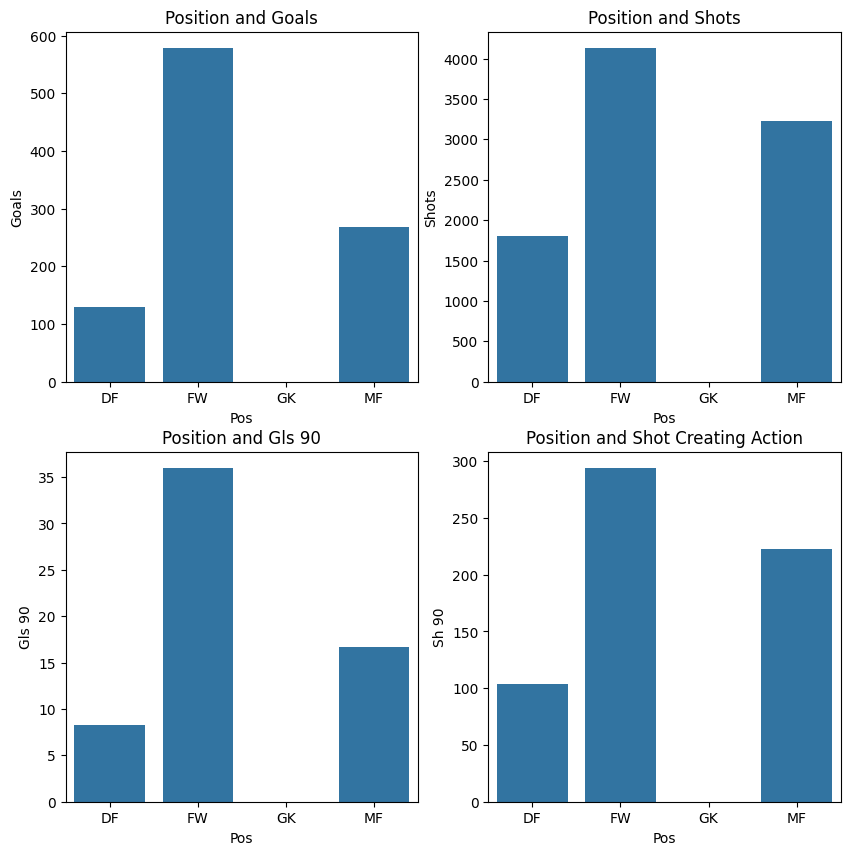

In [367]:
fig, ax=plt.subplots(2,2,figsize=(10,10))

goals_by_position=data.groupby('Pos')['Gls'].sum()
goals_by_position=goals_by_position.reset_index(name='Goals')

Ast_by_position=data.groupby('Pos')['Gls/90'].sum()
Ast_by_position=Ast_by_position.reset_index(name='Gls 90')

sh_by_position=data.groupby('Pos')['Shots'].sum()
sh_by_position=sh_by_position.reset_index(name='Shots')

sca_by_position=data.groupby('Pos')['Sh/90'].sum()
sca_by_position=sca_by_position.reset_index(name='Sh 90')

plt.subplot(2,2,1)
plt.title('Position and Goals')
sns.barplot(x=goals_by_position['Pos'],y=goals_by_position['Goals'])

plt.subplot(2,2,2)
plt.title('Position and Shots')
sns.barplot(x=sh_by_position['Pos'],y=sh_by_position['Shots'])

plt.subplot(2,2,3)
plt.title('Position and Gls 90')
sns.barplot(x=Ast_by_position['Pos'],y=Ast_by_position['Gls 90'])

plt.subplot(2,2,4)
plt.title('Position and Shot Creating Action')
sns.barplot(x=sca_by_position['Pos'],y=sca_by_position['Sh 90'])

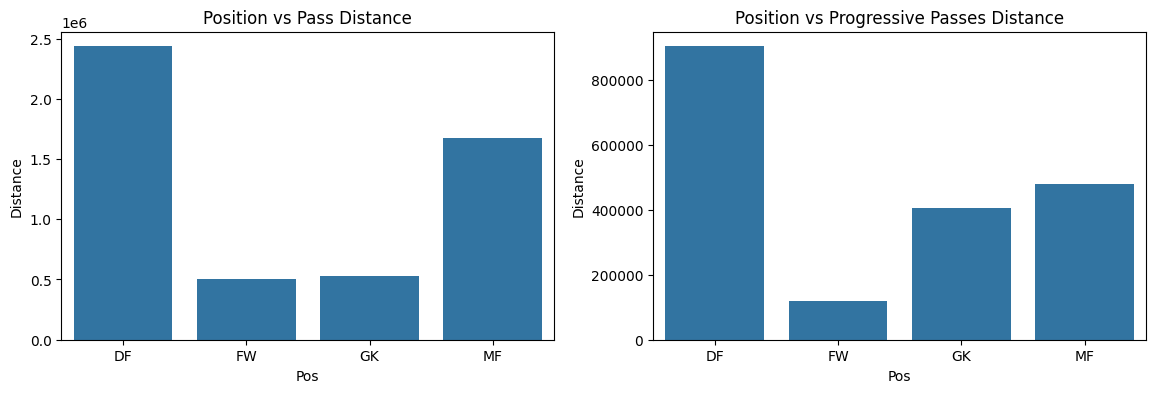

In [368]:
PasDis=data.groupby('Pos')['TotDist'].sum().reset_index(name='Distance')
PrgDis=data.groupby('Pos')['PrgDist'].sum().reset_index(name='Distance')

fig,ax=plt.subplots(1,2,figsize=(14,4))

plt.subplot(1,2,1)
plt.title('Position vs Pass Distance')
sns.barplot(x=PasDis['Pos'],y=PasDis['Distance'])

plt.subplot(1,2,2)
plt.title('Position vs Progressive Passes Distance')
sns.barplot(x=PrgDis['Pos'],y=PrgDis['Distance'])

plt.show()

In [369]:
passes_by_position=data.groupby('Pos')[['ShortPasses','MediumPasses','LongPasses']].sum()
passes_by_position

,ShortPasses,MediumPasses,LongPasses
Pos,,,
DF,66337.0,72824.0,22796.0
FW,25248.0,13827.0,4472.0
GK,3482.0,8658.0,14094.0
MF,59041.0,44108.0,14694.0


In [370]:
data.columns

Index(['Player', 'Pos', 'Min', '90s', 'Gls', 'Ast', 'xG', 'xAG', 'PrgCarries',
       'PrgPasses', 'Gls/90', 'Ast/90', 'xG/90', 'xAG/90', 'Shots', 'SoT',
       'Sh/90', 'SoT/90', 'Dist', 'TotDist', 'PrgDist', 'ShortPasses',
       'MediumPasses', 'LongPasses', 'xA', 'keyPass', 'FinalThirdPass',
       'PenaltyAreaPass', 'PenaltyAreaCross', 'SCA90', 'PassLive', 'PassDead',
       'SCA_TO', 'SCA_Shots', 'SCA_FoulsDrawn', 'SCA_Def', 'GCA90',
       'Tkl Def 3rd', 'Tkl Mid 3rd', 'Tkl Att 3rd', 'Challenges',
       'ShotsBlocked', 'PassesBlocked', 'Interceptions', 'Clearances',
       'Touches Def Pen', 'Touches Def 3rd', 'Touches Mid 3rd',
       'Touches Att 3rd', 'Touches Att Pen', 'Carries', 'Final Third Carry',
       'Carries to Penalty Area', 'Receive', 'PrgReceive', 'GameTime'],
      dtype='object')

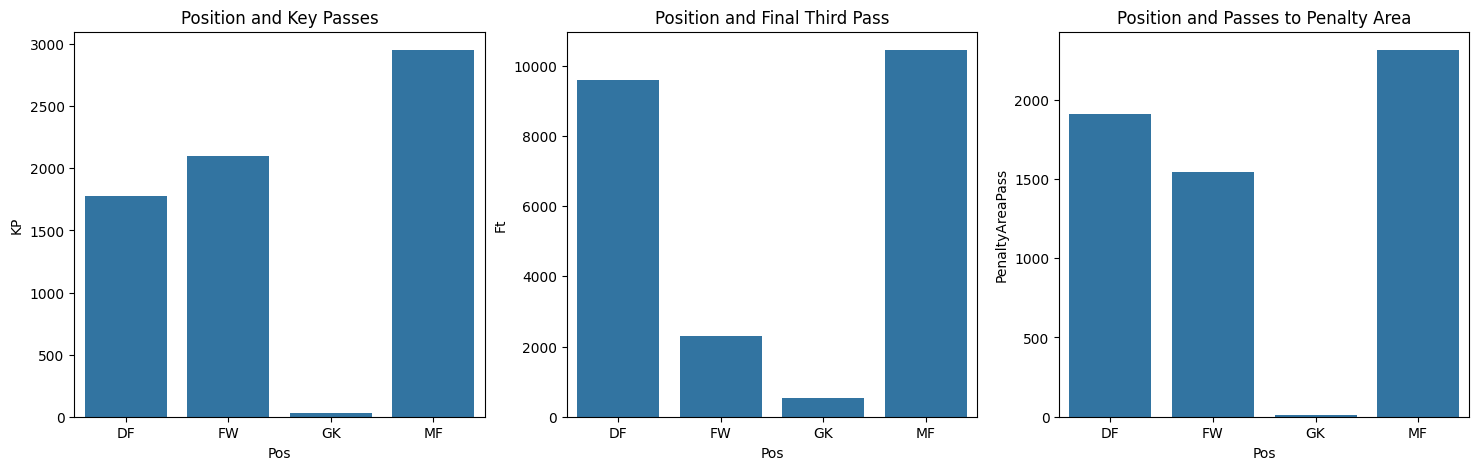

In [371]:
fig, ax=plt.subplots(1,3,figsize=(18,5))

KP_by_position=data.groupby('Pos')['keyPass'].sum()
KP_by_position=KP_by_position.reset_index(name='KP')

Ft_by_position=data.groupby('Pos')['FinalThirdPass'].sum()
Ft_by_position=Ft_by_position.reset_index(name='Ft')

pa_by_position=data.groupby('Pos')['PenaltyAreaPass'].sum()
pa_by_position=pa_by_position.reset_index(name='PenaltyAreaPass')

plt.subplot(1,3,1)
plt.title('Position and Key Passes')
sns.barplot(x=KP_by_position['Pos'],y=KP_by_position['KP'])

plt.subplot(1,3,2)
plt.title('Position and Final Third Pass')
sns.barplot(x=Ft_by_position['Pos'],y=Ft_by_position['Ft'])

plt.subplot(1,3,3)
plt.title('Position and Passes to Penalty Area')
sns.barplot(x=pa_by_position['Pos'],y=pa_by_position['PenaltyAreaPass'])

plt.show()

In [372]:
data['short_Pass_Ratio']=(data['ShortPasses']/(data['ShortPasses']+data['MediumPasses']+data['LongPasses']))
data['medium_Pass_Ratio']=(data['MediumPasses']/(data['ShortPasses']+data['MediumPasses']+data['LongPasses']))
data['long_Pass_Ratio']=(data['LongPasses']/(data['ShortPasses']+data['MediumPasses']+data['LongPasses']))
data.drop(columns=['ShortPasses','MediumPasses','LongPasses'],axis=1,inplace=True)

In [373]:
print(data.columns)
print(data.shape)

Index(['Player', 'Pos', 'Min', '90s', 'Gls', 'Ast', 'xG', 'xAG', 'PrgCarries',
       'PrgPasses', 'Gls/90', 'Ast/90', 'xG/90', 'xAG/90', 'Shots', 'SoT',
       'Sh/90', 'SoT/90', 'Dist', 'TotDist', 'PrgDist', 'xA', 'keyPass',
       'FinalThirdPass', 'PenaltyAreaPass', 'PenaltyAreaCross', 'SCA90',
       'PassLive', 'PassDead', 'SCA_TO', 'SCA_Shots', 'SCA_FoulsDrawn',
       'SCA_Def', 'GCA90', 'Tkl Def 3rd', 'Tkl Mid 3rd', 'Tkl Att 3rd',
       'Challenges', 'ShotsBlocked', 'PassesBlocked', 'Interceptions',
       'Clearances', 'Touches Def Pen', 'Touches Def 3rd', 'Touches Mid 3rd',
       'Touches Att 3rd', 'Touches Att Pen', 'Carries', 'Final Third Carry',
       'Carries to Penalty Area', 'Receive', 'PrgReceive', 'GameTime',
       'short_Pass_Ratio', 'medium_Pass_Ratio', 'long_Pass_Ratio'],
      dtype='object')
(532, 56)


In [374]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
model=ExtraTreesClassifier()
encoder=LabelEncoder()
data['GameTime']=encoder.fit_transform(data['GameTime'])
x=data.drop(columns=['Pos','Player'])
y=data.Pos
model.fit(x,y)
feature_imp=pd.Series(model.feature_importances_,index=x.columns)

In [375]:
feature_imp

Min                        0.009841
90s                        0.010152
Gls                        0.010712
Ast                        0.006579
xG                         0.020932
xAG                        0.008488
PrgCarries                 0.011251
PrgPasses                  0.020884
Gls/90                     0.012433
Ast/90                     0.006405
xG/90                      0.034308
xAG/90                     0.011532
Shots                      0.020438
SoT                        0.020964
Sh/90                      0.045628
SoT/90                     0.026163
Dist                       0.026543
TotDist                    0.015415
PrgDist                    0.027879
xA                         0.011516
keyPass                    0.008973
FinalThirdPass             0.017249
PenaltyAreaPass            0.010159
PenaltyAreaCross           0.017888
SCA90                      0.031579
PassLive                   0.010970
PassDead                   0.010274
SCA_TO                     0

In [376]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
selector=SelectKBest(score_func=mutual_info_classif,k=25)
x_selected=selector.fit(x,y)

In [377]:
feature_scores=pd.DataFrame({'Features':x.columns,'Score':selector.scores_})
feature_scores.sort_values(by='Score',ascending=False)

,Features,Score
14,Sh/90,0.594556
51,short_Pass_Ratio,0.488551
10,xG/90,0.463674
24,SCA90,0.397720
40,Touches Def Pen,0.395260
15,SoT/90,0.380574
4,xG,0.362438
44,Touches Att Pen,0.342997
16,Dist,0.336023
43,Touches Att 3rd,0.335352


In [378]:
y

0      DF
1      DF
2      DF
3      DF
4      GK
       ..
603    MF
604    DF
605    MF
606    DF
607    MF
Name: Pos, Length: 532, dtype: object

In [379]:
x.drop(columns=['SCA_TO','GameTime','Ast','Ast/90','SCA_Def','SCA_FoulsDrawn','xAG','TotDist','PassDead','Receive','keyPass','90s','Min','Carries','GCA90'],inplace=True)
y.drop(columns=['SCA_TO','GameTime','Ast','Ast/90','SCA_Def','SCA_FoulsDrawn','xAG','TotDist','PassDead','Receive','keyPass','90s','Min','Carries','GCA90'],inplace=True)

In [380]:
x.drop(columns=['xA','SCA_Shots','PenaltyAreaPass'],inplace=True)
y.drop(columns=['xA','SCA_Shots','PenaltyAreaPass'],inplace=True)

In [381]:
x.drop(columns=['Final Third Carry','Carries to Penalty Area','xAG/90','Gls'],inplace=True)
y.drop(columns=['Final Third Carry','Carries to Penalty Area','xAG/90','Gls'],inplace=True)

In [382]:
x.drop(columns=['Tkl Att 3rd','PassLive','PrgReceive','PrgCarries'],inplace=True)
y.drop(columns=['Tkl Att 3rd','PassLive','PrgReceive','PrgCarries'],inplace=True)

In [383]:
x.drop(columns=['Challenges','Interceptions','PassesBlocked'],inplace=True)
y.drop(columns=['Challenges','Interceptions','PassesBlocked'],inplace=True)

In [384]:
x.drop(columns=['SoT','ShotsBlocked'],inplace=True)
y.drop(columns=['SoT','ShotsBlocked'],inplace=True)

In [385]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

Fold Accuracy: 0.7037
Fold Accuracy: 0.7407
Fold Accuracy: 0.8679
Fold Accuracy: 0.7547
Fold Accuracy: 0.8491
Fold Accuracy: 0.8868
Fold Accuracy: 0.8491
Fold Accuracy: 0.6792
Fold Accuracy: 0.8113
Fold Accuracy: 0.6604


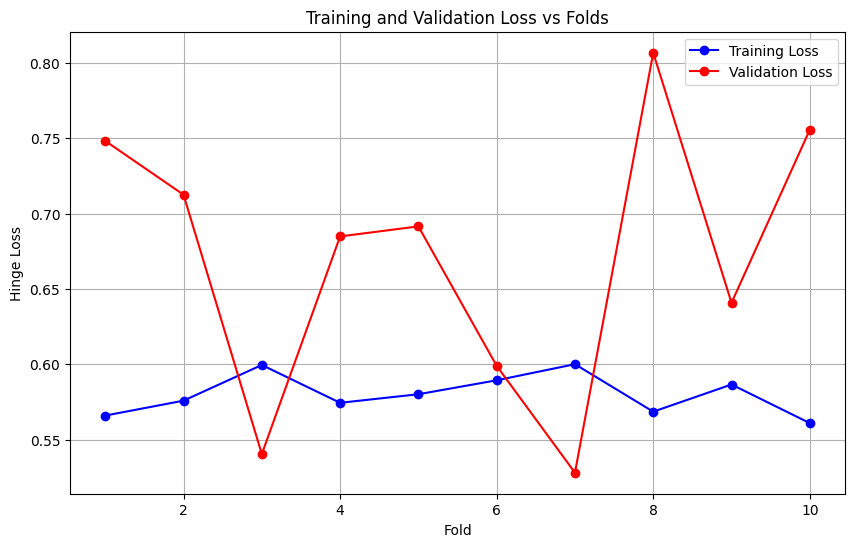

Mean Accuracy: 0.8622
Mean Accuracy: 0.7803


In [386]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, hinge_loss
from sklearn.model_selection import KFold


# Assuming `x` and `y` are defined as your features and target variable
kf = KFold(n_splits=10, shuffle=False)
tr_accu = []
te_accu = []
train_losses = []
test_losses = []

# Perform KFold cross-validation
for train, test in kf.split(x):
    x_train, x_test = x.iloc[train], x.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
    
    # Train Random Forest Classifier
    rf1 = RandomForestClassifier(max_depth=12, n_estimators=80,min_samples_split=6,max_leaf_nodes=10)
    rf1.fit(x_train, y_train)
    
    # Predict and calculate log loss
    y_train_prob = rf1.predict_proba(x_train)
    train_loss = hinge_loss(y_train, y_train_prob)
    train_losses.append(train_loss)
    tr_accu.append(accuracy_score(y_train,rf1.predict(x_train)))

    y_test_prob = rf1.predict_proba(x_test)
    test_loss = hinge_loss(y_test, y_test_prob)
    test_losses.append(test_loss)

    # Calculate accuracy
    predict = rf1.predict(x_test)
    accuracy = accuracy_score(predict, y_test)
    te_accu.append(accuracy)
    print(f"Fold Accuracy: {accuracy:.4f}")

# Plotting Loss vs Folds
folds = range(1, len(train_losses) + 1)

plt.figure(figsize=(10, 6))
plt.plot(folds, train_losses, label='Training Loss', marker='o', color='blue')
plt.plot(folds, test_losses, label='Validation Loss', marker='o', color='red')
plt.title('Training and Validation Loss vs Folds')
plt.xlabel('Fold')
plt.ylabel('Hinge Loss')
plt.legend()
plt.grid(True)
plt.show()

# Print average accuracy
te_mean_accuracy = np.mean(np.array(te_accu))
tr_mean_accuracy = np.mean(np.array(tr_accu))
print(f"Mean Accuracy: {tr_mean_accuracy:.4f}")
print(f"Mean Accuracy: {te_mean_accuracy:.4f}")



In [387]:
feature_importances=rf1.feature_importances_

In [388]:
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

In [389]:
importance_df

,Feature,Importance
5,Sh/90,0.127174
3,xG/90,0.097579
14,Clearances,0.081707
6,SoT/90,0.072380
15,Touches Def Pen,0.060411
20,short_Pass_Ratio,0.057045
1,PrgPasses,0.056468
17,Touches Mid 3rd,0.045530
21,medium_Pass_Ratio,0.042649
18,Touches Att 3rd,0.038280


In [390]:
import warnings
warnings.filterwarnings("ignore")

<Axes: ylabel='Density'>

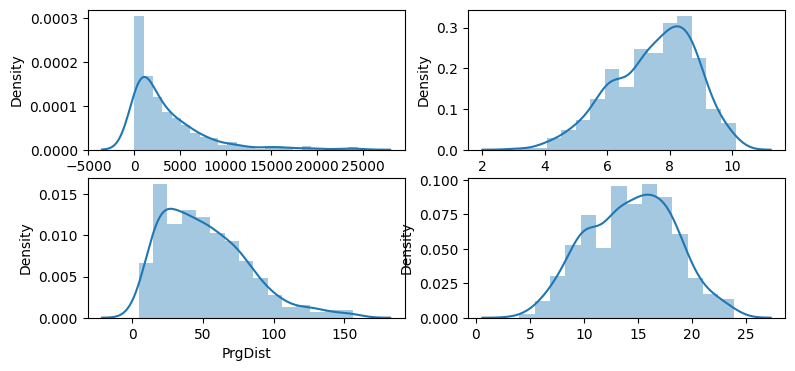

In [391]:
from scipy.stats import boxcox
fig,ax=plt.subplots(2,2,figsize=(9,4))
var= 'PrgDist'
plt.subplot(2,2,1)
sns.distplot(data[var])
plt.subplot(2,2,2)
sns.distplot(np.log(data[var]+1))
plt.subplot(2,2,3)
sns.distplot(np.sqrt(data[var]))
plt.subplot(2,2,4)
sns.distplot(boxcox(data[var]+1)[0])

In [392]:
data[data['Dist']==0]

,Player,Pos,Min,90s,Gls,Ast,xG,xAG,PrgCarries,PrgPasses,...,Touches Att Pen,Carries,Final Third Carry,Carries to Penalty Area,Receive,PrgReceive,GameTime,short_Pass_Ratio,medium_Pass_Ratio,long_Pass_Ratio
0,Nabil Aberdin,DF,180,2.0,0.0,0.0,0.0,0.0,0.0,7.0,...,1.0,47.0,0.0,0.0,54.0,0.0,1,0.337662,0.441558,0.220779
4,Julen Agirrezabala,GK,238,2.6,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,58.0,0.0,0.0,42.0,0.0,1,0.191919,0.272727,0.535354
28,Fabrizio Angileri,DF,164,1.8,0.0,0.0,0.0,1.3,2.0,7.0,...,1.0,59.0,2.0,0.0,62.0,6.0,1,0.413043,0.391304,0.195652
39,Kepa Arrizabalaga,GK,1198,13.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,313.0,0.0,0.0,300.0,0.0,1,0.197802,0.496703,0.305495
70,Yassine Bounou,GK,90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,16.0,0.0,0.0,16.0,0.0,1,0.161290,0.225806,0.612903
74,Claudio Bravo,GK,630,7.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,132.0,0.0,0.0,100.0,0.0,1,0.185022,0.378855,0.436123
87,Cárdenas,GK,90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,24.0,0.0,0.0,24.0,0.0,1,0.175000,0.400000,0.425000
117,Thibaut Courtois,GK,332,3.7,0.0,0.0,0.0,0.1,0.0,0.0,...,0.0,87.0,0.0,0.0,70.0,0.0,1,0.204918,0.516393,0.278689
124,Iván Cuéllar,GK,90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,27.0,0.0,0.0,21.0,0.0,1,0.114286,0.400000,0.485714
126,Eric Curbelo,DF,102,1.1,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,39.0,0.0,0.0,40.0,0.0,1,0.508475,0.457627,0.033898


In [393]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

0.8089010403473065
0.7707896575821105


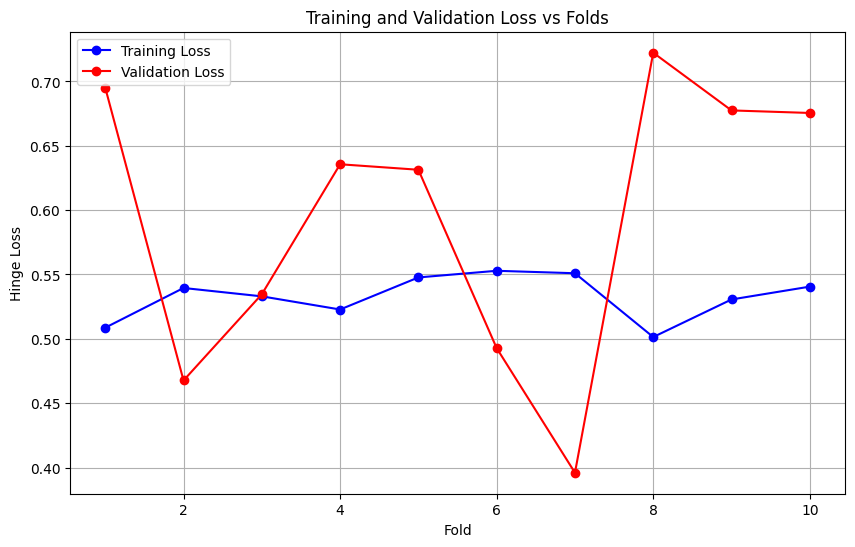

In [394]:
from sklearn.tree import DecisionTreeClassifier

kf = KFold(n_splits=10, shuffle=False)

train_accu=[]
test_accu=[]

train_losses=[]
test_losses=[]

for train, test in kf.split(x):
    #dtc=DecisionTreeClassifier(max_depth=20,min_samples_split=15,max_leaf_nodes=8,max_features=22)
    dtc=DecisionTreeClassifier(max_depth=20,min_samples_split=15,max_leaf_nodes=8,max_features=22)
    x_train,x_test=x.iloc[train],x.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]
    
    dtc.fit(x_train,y_train)
    
    predict=dtc.predict(x_test)
    train_accu.append(accuracy_score(dtc.predict(x_train),y_train))
    test_accu.append(accuracy_score(predict,y_test))

    # Predict and calculate log loss
    y_train_prob = dtc.predict_proba(x_train)
    train_loss = hinge_loss(y_train, y_train_prob)
    train_losses.append(train_loss)
    
    y_test_prob = dtc.predict_proba(x_test)
    test_loss = hinge_loss(y_test, y_test_prob)
    test_losses.append(test_loss)

folds = range(1, len(train_losses) + 1)

print(np.mean(np.array(train_accu)))
print(np.mean(np.array(test_accu)))

plt.figure(figsize=(10, 6))
plt.plot(folds, train_losses, label='Training Loss', marker='o', color='blue')
plt.plot(folds, test_losses, label='Validation Loss', marker='o', color='red')
plt.title('Training and Validation Loss vs Folds')
plt.xlabel('Fold')
plt.ylabel('Hinge Loss')
plt.legend()
plt.grid(True)
plt.show()


0.9100418410041841
0.8148148148148148
0.893305439330544
0.9259259259259259
0.8914405010438413
0.9056603773584906
0.8977035490605428
0.9245283018867925
0.8956158663883089
0.8679245283018868
0.8914405010438413
0.9433962264150944
0.8935281837160751
0.9245283018867925
0.9081419624217119
0.7924528301886793
0.906054279749478
0.8301886792452831
0.8872651356993737
0.8679245283018868


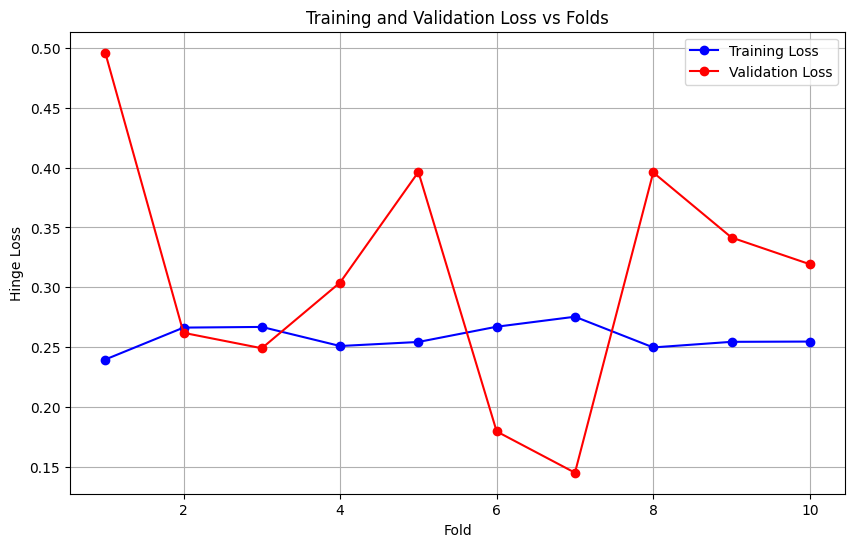

Mean Train accuracy: 0.89745372594579
Mean Test accuracy: 0.8797344514325646


In [395]:
from sklearn.linear_model import LogisticRegression

kf = KFold(n_splits=10, shuffle=False)

train_accu=[]
test_accu=[]

train_losses=[]
test_losses=[]

for train,test in kf.split(x):
    x_train,x_test=x.iloc[train],x.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]
    
    lrc=LogisticRegression(max_iter=200)
    lrc.fit(x_train,y_train)
    accuracy=accuracy_score(lrc.predict(x_train),y_train)
    print(accuracy)
    train_accu.append(accuracy)
    
    accuracy=accuracy_score(lrc.predict(x_test),y_test)
    print(accuracy)
    test_accu.append(accuracy)

    # Predict and calculate log loss
    y_train_prob = lrc.predict_proba(x_train)
    train_loss = log_loss(y_train, y_train_prob)
    train_losses.append(train_loss)
    
    y_test_prob = lrc.predict_proba(x_test)
    test_loss = log_loss(y_test, y_test_prob)
    test_losses.append(test_loss)

folds = range(1, len(train_losses) + 1)

plt.figure(figsize=(10, 6))
plt.plot(folds, train_losses, label='Training Loss', marker='o', color='blue')
plt.plot(folds, test_losses, label='Validation Loss', marker='o', color='red')
plt.title('Training and Validation Loss vs Folds')
plt.xlabel('Fold')
plt.ylabel('Hinge Loss')
plt.legend()
plt.grid(True)
plt.show()

print('Mean Train accuracy:',np.mean(np.array(train_accu)))
print('Mean Test accuracy:',np.mean(np.array(test_accu)))    

from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
voting_clf=VotingClassifier(
    estimators=[
        ('lr',LogisticRegression(max_iter=200)),
        ('svc',SVC(kernel='linear',C=1,probability=True)),
        ('dtc',DecisionTreeClassifier(max_depth=10,min_samples_split=8,max_leaf_nodes=8,max_features=22))
    ],
    voting='soft'
)

train_accu=[]
test_accu=[]
kf=KFold(n_splits=10,shuffle=False)
for train,test in kf.split(x):
    x_train,x_test=x.iloc[train],x.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]
    
    voting_clf.fit(x_train,y_train)
    accuracy=accuracy_score(voting_clf.predict(x_train),y_train)
    print(accuracy)
    train_accu.append(accuracy)
    
    accuracy=accuracy_score(voting_clf.predict(x_test),y_test)
    print(accuracy)
    test_accu.append(accuracy)

print('Mean Train accuracy:',np.mean(np.array(train_accu)))
print('Mean Test accuracy:',np.mean(np.array(test_accu)))    

from sklearn.svm import SVC


train_losses=[]
test_losses=[]

parameters={
    'kernel':['linear','rbf','poly','sigmoid'],
    'C':[1,5,10],
}
svc=SVC(kernel='linear',C=1,probability=True)
#gridsearch=GridSearchCV(svc,param_grid=parameters,cv=5,n_jobs=-1)
svc.fit(x_train,y_train)
# Predict and calculate log loss
y_train_prob = svc.predict_proba(x_train)
train_loss = hinge_loss(y_train, y_train_prob)
train_losses.append(train_loss)

y_test_prob = svc.predict_proba(x_test)
test_loss = hinge_loss(y_test, y_test_prob)
test_losses.append(test_loss)

#print(gridsearch.best_params_)

print(accuracy_score(svc.predict(x_train),y_train))
print(accuracy_score(svc.predict(x_test),y_test))

folds = range(1, len(train_losses) + 1)

print('Mean Train accuracy:',np.mean(np.array(train_accu)))
print('Mean Test accuracy:',np.mean(np.array(test_accu)))   

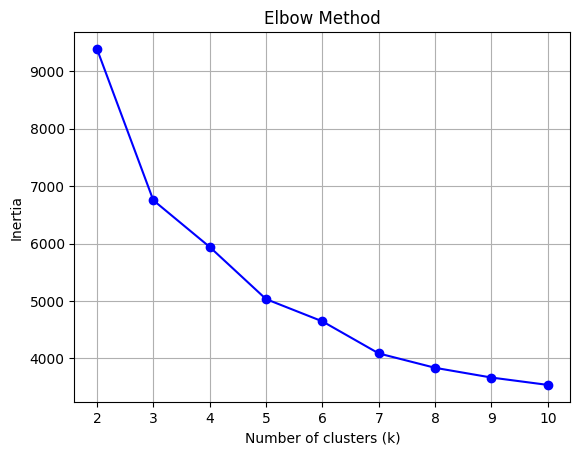

In [532]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    PowerTransformer(method='yeo-johnson', standardize=False),  # handles skew and 0s
    StandardScaler()  # ensures unit variance, mean = 0
)

x_transformed = pipe.fit_transform(x)

inertias = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_transformed)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()


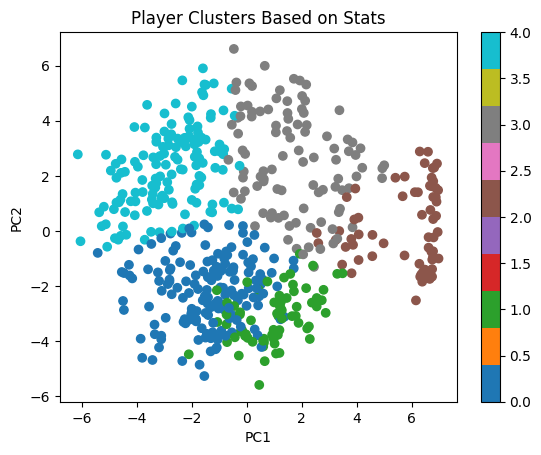

In [534]:

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(x_transformed)
x['clusters']=clusters

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(x_transformed)

plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap='tab10')
plt.title("Player Clusters Based on Stats")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

In [556]:
x['Player_Name']=data.Player
x['Pos']=data.Pos

In [558]:
x_check=x[['Player_Name','Pos','clusters']]

In [588]:
x_check[x_check['clusters']==5].count()

Player_Name    0
Pos            0
clusters       0
dtype: int64

In [592]:
x.sort_values(by='clusters').to_csv("C:/Users/prana/DA_Project_1/player_cluster.csv")